In [1]:
# - affichage des types d'événements (payant et gratuite)

In [2]:
# !pip install pandas

In [3]:
import pandas as pd

In [4]:
pd.__version__

'1.5.3'

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("que-faire-a-paris-.csv", sep=';', header=0)

In [7]:
df.shape

(2123, 42)

In [8]:
df_propre = df.copy()

In [9]:
# Remove missing values
df_propre.dropna(how='all', inplace=True)

In [10]:
# df_propre.fillna('None', inplace=True)  # pas besoin : df_propre.isnull().values.any() utilisé
df_propre.isnull().values.any()

True

In [11]:
index_ville = df_propre[df_propre["address_city"] != "Paris"].index
df_propre.drop(index_ville, inplace= True)

In [12]:
# Supprimer les colonnes différentes - autre manière
columns_to_keep = ['id', 'title', 'date_start', 'date_end', 'tags', 'address_name', 'address_street',
       'address_zipcode', 'lat_lon', 'price_type']
df_propre.drop(df.columns.difference(columns_to_keep), axis=1, inplace=True)

In [13]:
df_propre['price_type'] = df_propre['price_type'].replace('gratuit sous condition', 'gratuit')

In [14]:
df_propre['tags'] = df_propre['tags'].str.split(';').str[0]

In [15]:
df_propre['address_zipcode'].value_counts()

75012     220
75013     155
75019     145
75010     137
75001     137
75018     134
75020     125
75015     116
75014     113
75011     108
75016      84
75005      82
75004      72
75003      61
75006      59
75009      54
75007      44
75008      40
75017      28
75002      13
75116       5
92210       1
75 012      1
76006       1
75000       1
75 011      1
78560       1
Name: address_zipcode, dtype: int64

In [16]:
import re

In [17]:
df_propre['address_zipcode'] = df_propre['address_zipcode'].str.replace('\s', '')
df_propre['address_zipcode'] = df_propre['address_zipcode'].str.replace('751', '750')
df_propre = df_propre[df_propre['address_zipcode'].str.match('^750[0-2][0-9]$')]

df_propre['address_zipcode'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_19452\3170897223.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_propre['address_zipcode'] = df_propre['address_zipcode'].str.replace('\s', '')


75012    221
75013    155
75019    145
75010    137
75001    137
75018    134
75020    125
75015    116
75014    113
75011    109
75016     89
75005     82
75004     72
75003     61
75006     59
75009     54
75007     44
75008     40
75017     28
75002     13
75000      1
Name: address_zipcode, dtype: int64

In [18]:
df_propre.shape

(1935, 10)

In [19]:
df_propre['tags'].value_counts()

Atelier              374
Concert              368
Enfants              206
Conférence           166
Expo                 121
Art contemporain     106
Théâtre               81
Cinéma                79
Littérature           65
Danse                 52
Balade                51
Loisirs               40
Musique               35
Clubbing              19
Humour                18
Innovation            15
Jeux 2024             11
BD                    11
Histoire              11
Spectacle musical      9
Sport                  9
Cirque                 8
Solidarité             8
Nature                 6
LGBT                   6
Photo                  6
Brocante               5
Gourmand               5
Salon                  4
Peinture               3
Sciences               2
Santé                  2
Name: tags, dtype: int64

In [20]:
tags_series = df_propre['tags']

In [21]:
tags_series.shape

(1935,)

In [22]:
address_zipcode_series = df_propre['address_zipcode']

In [23]:
address_zipcode_series.shape

(1935,)

In [24]:
price_type_series = df_propre['price_type']

In [25]:
price_type_series.shape

(1935,)

In [26]:
df_tags_zip_price = pd.DataFrame({'tags': tags_series, 'zip': address_zipcode_series, 'price': price_type_series})

In [27]:
df_tags_zip_price.shape

(1935, 3)

In [28]:
df_propre.shape

(1935, 10)

In [29]:
pd.crosstab(df_propre['tags'], df_propre['price_type'])

price_type,gratuit,payant
tags,,
Art contemporain,71,35
Atelier,248,126
BD,10,1
Balade,33,18
Brocante,5,0
Cinéma,49,30
Cirque,1,7
Clubbing,7,12
Concert,94,273


In [30]:
df_propre.dtypes

id                  int64
title              object
date_start         object
date_end           object
tags               object
address_name       object
address_street     object
address_zipcode    object
lat_lon            object
price_type         object
dtype: object

In [31]:
# !pip install seaborn

In [32]:
import seaborn as sns

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<Axes: xlabel='tags', ylabel='price'>

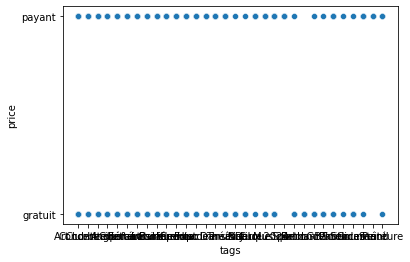

In [34]:
sns.scatterplot(x='tags', y='price', data=df_tags_zip_price)

In [36]:
sns.boxplot(x='tags', y='price', data=df_tags_zip_price)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [37]:
sns.pieplot()

AttributeError: module 'seaborn' has no attribute 'pieplot'

#  pie chart

In [38]:
liste_types_d_evenements_pas_doublane = []
liste_types_d_evenements_doublane = []
dict={}

for i in df_propre['tags']:
    liste_types_d_evenements_doublane.append(i)
    if i not in liste_types_d_evenements_pas_doublane:
        liste_types_d_evenements_pas_doublane.append(i)
            
for i in liste_types_d_evenements_doublane:
    if i in dict:
        dict[i]+=1
    else:
        dict[i]=1

df_tags = pd.DataFrame(list(dict.items()), columns = ['evenement', 'occurrences'])

In [39]:
df_tags

,evenement,occurrences
0,Concert,368
1,Clubbing,19
2,Art contemporain,106
3,Atelier,374
4,Cinéma,79
5,Enfants,206
6,Littérature,65
7,Loisirs,40
8,Balade,51
9,Conférence,166


In [40]:
df_filtered = df_tags[df_tags['occurrences'] > 33]
df_filtered

,evenement,occurrences
0,Concert,368
2,Art contemporain,106
3,Atelier,374
4,Cinéma,79
5,Enfants,206
6,Littérature,65
7,Loisirs,40
8,Balade,51
9,Conférence,166
11,Expo,121


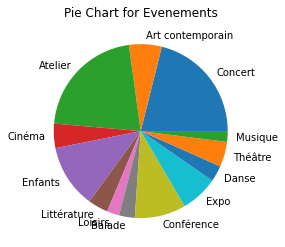

In [41]:
# Create the pie chart
fig, ax = plt.subplots()
ax.pie(df_filtered['occurrences'], labels=df_filtered['evenement'])
# ax.pie(df_filtered['occurrences'], labels=df_filtered['evenement'], autopct='%1.1f%%')

# Add a title
ax.set_title('Pie Chart for Evenements')

# Show the plot
plt.show()

# Pour chaque activite (occurences)

<Axes: xlabel='occurrences', ylabel='evenement'>

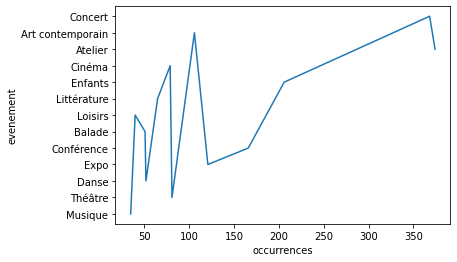

In [42]:
sns.lineplot(x='occurrences', y='evenement', data=df_filtered)

<Axes: xlabel='occurrences', ylabel='evenement'>

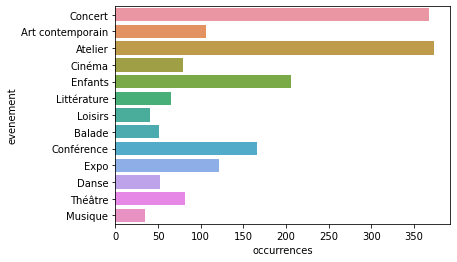

In [43]:
sns.barplot(x='occurrences', y='evenement', data=df_filtered)

# Pour chaque activite (gratuit / payant)

In [409]:
tags_payant_gratuit = pd.crosstab(df_propre['tags'], df_propre['price_type'])

In [ ]:
# df_tags_payant_gratuit = pd.DataFrame(list(dict.items()), columns = ['evenement', 'occurrences_gratuit', 'occurrences_payant'])

In [421]:
df_tags_zip_price

,tags,zip,price
1,Concert,75012,payant
3,Clubbing,75001,gratuit
4,Concert,75001,gratuit
5,Concert,75019,payant
6,Concert,75016,payant
7,Art contemporain,75003,gratuit
8,Atelier,75011,payant
9,Atelier,75013,payant
11,Cinéma,75019,gratuit
12,Atelier,75013,gratuit


In [412]:
# condition_occur = (tags_payant_gratuit['gratuit'] + tags_payant_gratuit['payant']) > 33
# tags_payant_gratuit = tags_payant_gratuit[condition_occur]
# tags_payant_gratuit

price_type,gratuit,payant
tags,,
Art contemporain,71,35
Atelier,248,126
BD,10,1
Balade,33,18
Brocante,5,0
Cinéma,49,30
Cirque,1,7
Clubbing,7,12
Concert,94,273


In [ ]:
df_tags_zip_price['tags']

ValueError: could not convert string to float: 'payant'

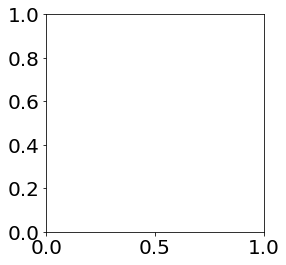

In [424]:
# mpl.rcParams['axes.labelsize'] = 20
# mpl.rcParams['xtick.labelsize'] = 20
# mpl.rcParams['ytick.labelsize'] = 20
# mpl.rcParams['legend.fontsize'] = 20
# plt.figure(figsize=(50,50))

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(df_tags_zip_price['price'], labels=df_tags_zip_price['tags']=='Concert')

# Add a title
ax.set_title('Pie Chart for Evenements')

# Show the plot
plt.show()



In [430]:
ct = pd.crosstab(df_tags_zip_price['price'],df_tags_zip_price['tags']=='Concert')
ct
# ct.plot.pie(subplots=True)
# plt.legend(title='XYZ')
# plt.show()

tags,False,True
price,,
gratuit,1017,94
payant,547,273


<Axes: xlabel='tags', ylabel='Count'>

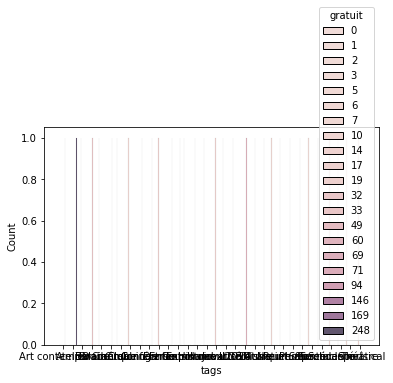

In [384]:
sns.histplot(data=tags_payant_gratuit, x="tags", hue="gratuit", multiple="dodge", shrink=.8)

<Axes: xlabel='gratuit', ylabel='Count'>

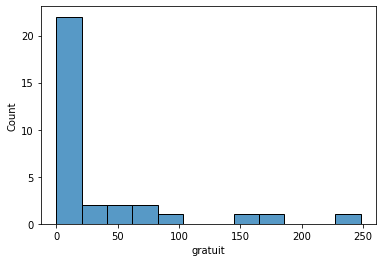

In [375]:
sns.histplot(data=tags_payant_gratuit, x="gratuit")